In [1]:
import pandas as pd

In [2]:
df = pd.read_json('/kaggle/input/vsec-dataset-for-vietnammese-correction-words/VSEC.jsonl', lines = True)
df

,annotations,text
0,"[{'alternative_syllables': [], 'current_syllab...","Thông qua công tác tuyên truyền, vận động này ..."
1,"[{'alternative_syllables': [], 'current_syllab...","Do đó, doanh nghiệp cần chú trọng đến yếu tố n..."
2,"[{'alternative_syllables': [], 'current_syllab...",Giữ được chỉ số này không giam mà còn tăng thê...
3,"[{'alternative_syllables': ['Đứng'], 'current_...",Đúng trước thực tế này đòi hỏi chúng ta cần ph...
4,"[{'alternative_syllables': [], 'current_syllab...",Trình độ học vấn của nhân viên được tuyển dụng...
...,...,...
9336,"[{'alternative_syllables': [], 'current_syllab...","Tuy nhiên, khi nói đến E-Learning, các phương ..."
9337,"[{'alternative_syllables': [], 'current_syllab...",Đứng trước những hành vi đi ngược lại với đạo ...
9338,"[{'alternative_syllables': [], 'current_syllab...",Quan điểm biện chứng của chù nghĩa Mác - Lênin...
9339,"[{'alternative_syllables': [], 'current_syllab...","Đối với biểu đồ Histogram, nếu giá trị trung b..."


In [3]:
df['annotations'][0]

[{'alternative_syllables': [],
  'current_syllable': 'Thông',
  'id': 1,
  'is_correct': True},
 {'alternative_syllables': [],
  'current_syllable': 'qua',
  'id': 2,
  'is_correct': True},
 {'alternative_syllables': [],
  'current_syllable': 'công',
  'id': 3,
  'is_correct': True},
 {'alternative_syllables': [],
  'current_syllable': 'tác',
  'id': 4,
  'is_correct': True},
 {'alternative_syllables': [],
  'current_syllable': 'tuyên',
  'id': 5,
  'is_correct': True},
 {'alternative_syllables': [],
  'current_syllable': 'truyền,',
  'id': 6,
  'is_correct': True},
 {'alternative_syllables': [],
  'current_syllable': 'vận',
  'id': 7,
  'is_correct': True},
 {'alternative_syllables': [],
  'current_syllable': 'động',
  'id': 8,
  'is_correct': True},
 {'alternative_syllables': [],
  'current_syllable': 'này',
  'id': 9,
  'is_correct': True},
 {'alternative_syllables': [],
  'current_syllable': 'phụ',
  'id': 10,
  'is_correct': True},
 {'alternative_syllables': [],
  'current_syllabl

In [4]:
import pandas as pd
import ast

def process_annotations(annotations):
    num_annotations = len(annotations)
    incorrect_positions = []
    incorrect_words = []
    correct_words = []

    for i, ann in enumerate(annotations):
        if ann['alternative_syllables']:  # Nếu có từ thay thế => sai
            incorrect_positions.append(i)
            incorrect_words.append(ann['current_syllable'])
            correct_words.append(ann['alternative_syllables'])

    num_incorrect = len(incorrect_positions)
    return pd.Series([num_annotations, num_incorrect, incorrect_positions, incorrect_words, correct_words])

# Áp dụng vào DataFrame
df[['num_annotations', 'num_incorrect', 'incorrect_positions', 'incorrect_words', 'correct_words']] = df['annotations'].apply(process_annotations)

In [5]:
df

,annotations,text,num_annotations,num_incorrect,incorrect_positions,incorrect_words,correct_words
0,"[{'alternative_syllables': [], 'current_syllab...","Thông qua công tác tuyên truyền, vận động này ...",56,1,[51],[sanh],[[xanh]]
1,"[{'alternative_syllables': [], 'current_syllab...","Do đó, doanh nghiệp cần chú trọng đến yếu tố n...",22,1,[12],[là],[[làm]]
2,"[{'alternative_syllables': [], 'current_syllab...",Giữ được chỉ số này không giam mà còn tăng thê...,22,2,"[6, 16]","[giam, bức]","[[giảm], [bước]]"
3,"[{'alternative_syllables': ['Đứng'], 'current_...",Đúng trước thực tế này đòi hỏi chúng ta cần ph...,40,1,[0],[Đúng],[[Đứng]]
4,"[{'alternative_syllables': [], 'current_syllab...",Trình độ học vấn của nhân viên được tuyển dụng...,23,1,[11],[cang],[[càng]]
...,...,...,...,...,...,...,...
9336,"[{'alternative_syllables': [], 'current_syllab...","Tuy nhiên, khi nói đến E-Learning, các phương ...",39,1,[29],[hoc],[[học]]
9337,"[{'alternative_syllables': [], 'current_syllab...",Đứng trước những hành vi đi ngược lại với đạo ...,58,1,[42],"[duc,]","[[dục,]]"
9338,"[{'alternative_syllables': [], 'current_syllab...",Quan điểm biện chứng của chù nghĩa Mác - Lênin...,39,1,[5],[chù],[[chủ]]
9339,"[{'alternative_syllables': [], 'current_syllab...","Đối với biểu đồ Histogram, nếu giá trị trung b...",52,1,[37],[xếp],[[xấp]]


In [6]:
df['num_annotations'].describe()

count    9341.000000
mean       30.238625
std        12.793480
min         4.000000
25%        20.000000
50%        30.000000
75%        40.000000
max        64.000000
Name: num_annotations, dtype: float64

In [7]:
df['num_incorrect'].describe()

count    9341.000000
mean        1.199229
std         0.523151
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         8.000000
Name: num_incorrect, dtype: float64

In [8]:
df[df['num_incorrect']>1]

,annotations,text,num_annotations,num_incorrect,incorrect_positions,incorrect_words,correct_words
2,"[{'alternative_syllables': [], 'current_syllab...",Giữ được chỉ số này không giam mà còn tăng thê...,22,2,"[6, 16]","[giam, bức]","[[giảm], [bước]]"
7,"[{'alternative_syllables': [], 'current_syllab...",Các lệnh được gửi tử Home Gateway mà ổ điện th...,46,2,"[4, 41]","[tử, nắp]","[[từ], [lắp]]"
15,"[{'alternative_syllables': [], 'current_syllab...","Tuy nh iên, mục tiêu của P4 là còn có thể tái ...",23,2,"[1, 2]","[nh, iên,]","[[], [nhiên,]]"
33,"[{'alternative_syllables': [], 'current_syllab...","Bên cạnh đó, ai trong forum cũng có quyền lên ...",33,2,"[14, 26]","[ự, truyề]","[[tự], [truyền]]"
41,"[{'alternative_syllables': [], 'current_syllab...","Do vậy, trên thế giới ngoài những vấn đề nóng ...",47,2,"[14, 24]","[dữ, tao,]","[[dự], [tạo,]]"
...,...,...,...,...,...,...,...
9312,"[{'alternative_syllables': [], 'current_syllab...",Nâng cao hiệu suất của lập trình viên: Việc sử...,39,2,"[23, 31]","[lên, lên]","[[nên], [nên]]"
9319,"[{'alternative_syllables': [], 'current_syllab...","Trong công tác chăm sóc sứ khoẻ, nhiều phương ...",46,3,"[5, 6, 40]","[sứ, khoẻ,, khoẻ]","[[sức], [khỏe], [khỏe]]"
9324,"[{'alternative_syllables': [], 'current_syllab...",Về kiểm tra chất lượng kỹ thuật bảo vệ môi trư...,54,2,"[20, 52]","[củ, xản]","[[cụ], [sản]]"
9326,"[{'alternative_syllables': [], 'current_syllab...",Vị trí đặc điểm địa hình khiến Việt Nam là một...,54,2,"[29, 40]","[xâm, sảy]","[[xâm nhập], [xảy]]"


In [9]:
df['num_annotations'].value_counts()

num_annotations
28    267
29    266
30    266
25    260
32    256
33    255
24    254
27    253
23    237
31    236
21    228
26    227
19    226
34    224
20    223
40    217
37    217
38    214
18    213
36    213
22    212
35    211
17    207
16    204
39    202
13    193
15    191
14    190
44    178
41    177
43    174
12    165
45    159
42    157
47    146
46    146
48    145
11    143
52    142
10    126
53    116
49    116
51    116
9     115
54    105
50    100
8      98
55     72
56     61
7      60
6      53
57     42
5      24
58     23
59      9
60      4
61      4
4       2
64      1
Name: count, dtype: int64

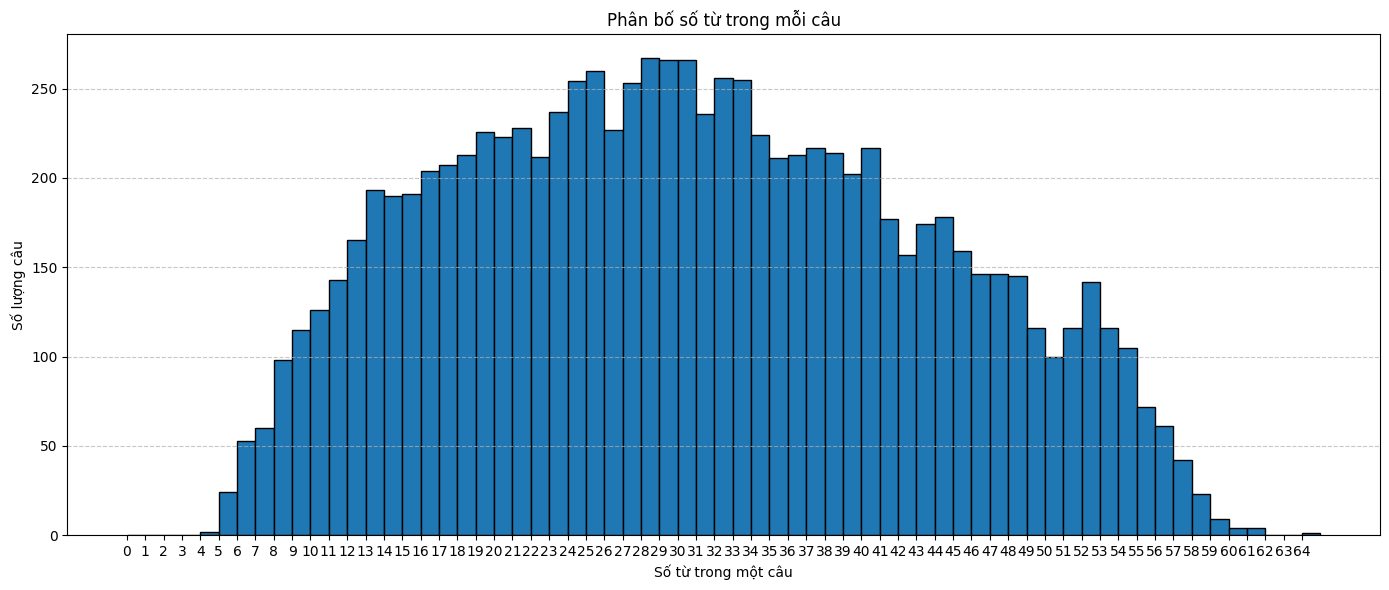

In [10]:
import matplotlib.pyplot as plt

# Giả sử bạn đã có cột num_annotations
plt.figure(figsize=(14, 6))
plt.hist(df['num_annotations'], bins=range(df['num_annotations'].max()+2), edgecolor='black')
plt.title('Phân bố số từ trong mỗi câu')
plt.xlabel('Số từ trong một câu')
plt.ylabel('Số lượng câu')
plt.xticks(range(df['num_annotations'].max()+1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


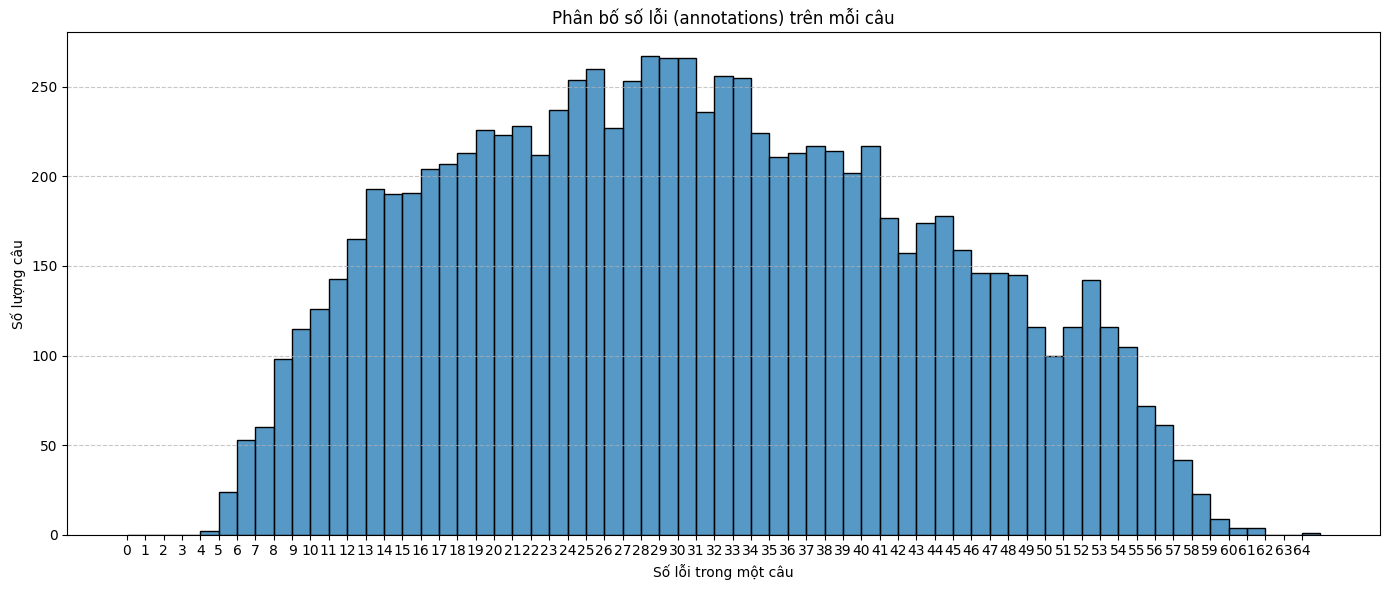

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.histplot(df['num_annotations'], bins=range(df['num_annotations'].max()+2), kde=False, edgecolor='black')
plt.title('Phân bố số lỗi (annotations) trên mỗi câu')
plt.xlabel('Số lỗi trong một câu')
plt.ylabel('Số lượng câu')
plt.xticks(range(df['num_annotations'].max()+1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [12]:
df['num_incorrect'].value_counts()

num_incorrect
1    7853
2    1224
3     191
4      47
5      20
6       3
7       2
8       1
Name: count, dtype: int64

In [13]:
df['num_incorrect'].describe()

count    9341.000000
mean        1.199229
std         0.523151
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         8.000000
Name: num_incorrect, dtype: float64

In [14]:
sum(df['num_incorrect'])

11202

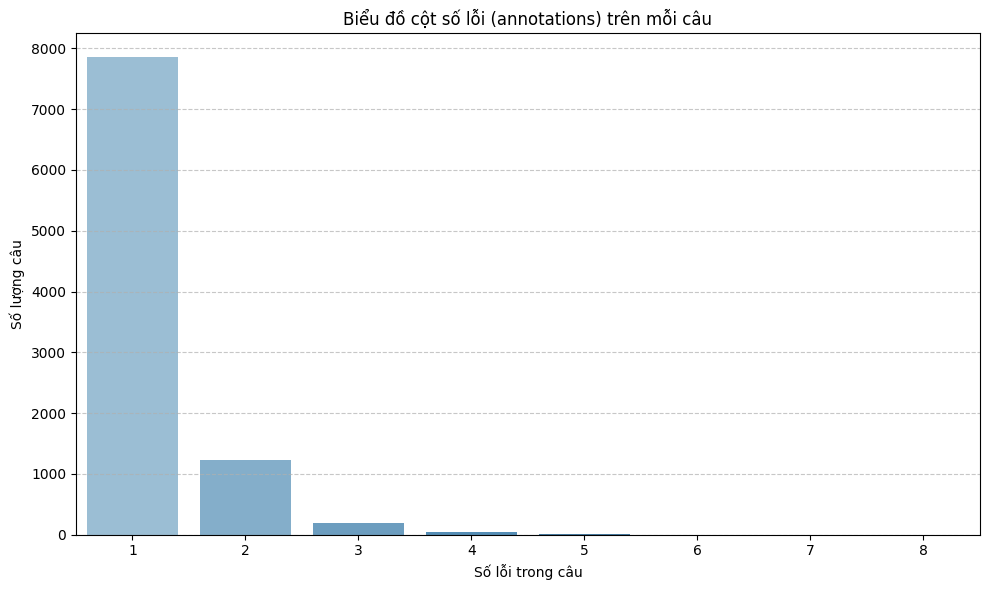

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu
counts = df['num_incorrect'].value_counts().sort_index()
data = counts.reset_index()
data.columns = ['num_errors', 'num_sentences']

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x='num_errors', y='num_sentences', data=data, palette='Blues_d')
plt.title('Biểu đồ cột số lỗi (annotations) trên mỗi câu')
plt.xlabel('Số lỗi trong câu')
plt.ylabel('Số lượng câu')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [16]:
unique_corrections = set()

for _, row in df.iterrows():
    for wrong, correct_list in zip(row['incorrect_words'], row['correct_words']):
        if correct_list:  # kiểm tra không rỗng
            for correct in correct_list:
                # Kiểm tra nếu từ sai khác với từ đúng, và đảm bảo rằng từ đúng là một chuỗi
                if wrong != correct and isinstance(correct, str):
                    unique_corrections.add((wrong, correct))

# Chuyển về list nếu cần
unique_corrections = list(unique_corrections)

# In kết quả (ví dụ in 5 cặp đầu tiên)
print("Tổng số cặp lỗi-sửa khác biệt:", len(unique_corrections))
print("Ví dụ:", unique_corrections[:100])

Tổng số cặp lỗi-sửa khác biệt: 5210
Ví dụ: [('đế', 'đến'), ('phần', 'phân'), ('trường.', 'trương.'), ('tuyển', 'tuyên'), ('hạn', 'hạng'), ('cachs', 'cách'), ('nghĩaa,', 'nghĩa'), ('Nkhí', 'khí'), ('chi', 'chỉ'), ('gỉai', 'giải'), ('nả,', 'tảng'), ('toan', 'toán'), ('nến', 'nếu'), ('vảo', 'bảo'), ('cấu,', 'cầu,'), ('yéu,', 'yêu'), ('đo', 'đó'), ('dùng', 'dung'), ('phân', 'phần'), ('chúng', 'chung'), ('bữa', 'bừa'), ('han', 'hán'), ('hận', 'nhận'), ('hội', 'hối'), ('căng', 'năng'), ('hương', 'hướng'), ('xa', 'xã'), ('nưỡng.', 'ngưởng'), ('kể', 'kế'), ('tài', 'tải'), ('nược', 'nước'), ('dùn', 'dung'), ('bệnhlại', 'bệnh lại'), ('phe.', 'phê.'), ('p', ''), ('tinn', 'tin'), ('bóng', 'bong'), ('g', 'lượng'), ('giã', 'giả'), ('tổn', 'tồn'), ('ván', 'vấn'), ('tang.', 'tăng.'), ('moi', 'mọi'), ('ta', 'tay'), ('Mang', 'Mạng'), ('khác', 'khá'), ('nảy,', 'này'), ('chặc', 'chặt'), ('thi', ''), ('vi', 'vị'), ('thep', 'theo'), ('tê', 'tên'), ('thưởng', 'thường'), ('năm.', 'Nam.'), ('dựn', 'dựng'), ('g

In [17]:
# unique_corrections = set()

# for _, row in df.iterrows():
#     for wrong, correct_list in zip(row['incorrect_words'], row['correct_words']):
#         if correct_list:  # kiểm tra không rỗng
#             for correct in correct_list:
#                 # Kiểm tra nếu từ sai khác với từ đúng, và đảm bảo rằng từ đúng là một chuỗi
#                 if wrong != correct and isinstance(correct, str):
#                     if correct !="":
#                         unique_corrections.add((wrong, correct))

# # Chuyển về list nếu cần
# unique_corrections = list(unique_corrections)

# # In kết quả (ví dụ in 5 cặp đầu tiên)
# print("Tổng số cặp lỗi-sửa khác biệt:", len(unique_corrections))
# print("Ví dụ:", unique_corrections[:100])

In [18]:
!pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.7 MB/s eta 0:00:00


In [19]:
import Levenshtein
# Hàm đếm số lỗi "gõ sai" với Levenshtein distance <= 2 (có thể chỉnh)
typing_errors = [pair for pair in unique_corrections if Levenshtein.distance(pair[0], pair[1]) <= 1]

# Kết quả
print("Số lỗi do gõ sai (ước lượng):", len(typing_errors))
print("Ví dụ lỗi gõ sai:", typing_errors[:10])

Số lỗi do gõ sai (ước lượng): 3942
Ví dụ lỗi gõ sai: [('đế', 'đến'), ('phần', 'phân'), ('trường.', 'trương.'), ('tuyển', 'tuyên'), ('hạn', 'hạng'), ('Nkhí', 'khí'), ('chi', 'chỉ'), ('toan', 'toán'), ('nến', 'nếu'), ('vảo', 'bảo')]


In [20]:
# Tải file từ GitHub
!wget https://raw.githubusercontent.com/duyetdev/vietnamese-wordlist/master/Viet74K.txt -O viet74k.txt

# Đọc file vào một tập hợp từ
with open("viet74k.txt", "r", encoding="utf-8") as f:
    vietnamese_vocab = set(word.strip().lower() for word in f)

print("Số từ trong từ điển:", len(vietnamese_vocab))
print("Ví dụ:", list(vietnamese_vocab)[:10])

--2025-06-22 14:27:03--  https://raw.githubusercontent.com/duyetdev/vietnamese-wordlist/master/Viet74K.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 988627 (965K) [text/plain]
Saving to: ‘viet74k.txt’

viet74k.txt         100%[===================>] 965.46K  --.-KB/s    in 0.05s   

2025-06-22 14:27:03 (20.1 MB/s) - ‘viet74k.txt’ saved [988627/988627]

Số từ trong từ điển: 72535
Ví dụ: ['dũng', 'cảm tử', 'lo sợ', 'chữ rời', 'hậu cung', 'nhảy nọc', 'chỏng lỏn', 'nhảy ô', 'khâm định việt sử thông', 'như hũ nút']


In [21]:
all_incorrect_words = sum(df['incorrect_words'], [])

In [22]:
# Giả sử bạn đã có danh sách all_incorrect_words và từ điển vietnamese_vocab (là một tập hợp các từ hợp lệ)
all_incorrect_words = [w.lower() for w in all_incorrect_words if w.lower() not in vietnamese_vocab]
print("Số lượng từ không có nghĩa:", len(all_incorrect_words))
print("Ví dụ:", all_incorrect_words[:50])

Số lượng từ không có nghĩa: 3665
Ví dụ: ['cang', 'nghệp', 'nghiêp', 'tranhh', 'chẩy', 'nh', 'iên,', 'hoạc.', 'qúa', 'đươc', 'cachh', 'hoc', 'ự', 'truyề', 'gỉa', 'chăt', 'dến', 'tinh.', 'tao,', 'them', 'anăng', 'vàahệ', 'cõ', 'điã', 'phân,', 'mưởi', 'găp', 'kêt', 'đươc', 'nữa.', 'ận', 'nhiệu', 'rang,', 'đạ', 'chiểu.', 'hỗi', 'than,', 'fthu', 'trog', 'tuý', 'hnhf,', 'tuwf', 'ngoaì,', 'tao.', 'it', '"ắn', 'giảing', 'ghĩ', 'tực', 'mêm']


In [23]:
len(all_incorrect_words)/sum(df['num_incorrect'])

0.3271737189787538

In [24]:
corrections = []
for _, row in df.iterrows():
    for wrong, correct_list in zip(row['incorrect_words'], row['correct_words']):
        if correct_list:
            for correct in correct_list:
                if wrong != correct and isinstance(correct, str):
                    corrections.append([wrong, correct])


In [25]:
# Sai chính tả
COMMON_ORTHO_ERRORS = [
    ('x', 's'), ('s', 'x'),
    ('ch', 'tr'), ('tr', 'ch'),
    ('d', 'gi'), ('gi', 'd'), ('r', 'gi'), ('gi', 'r'),
    ('l', 'n'), ('n', 'l'),
    ('i', 'y'), ('y', 'i'),
    ('c', 'k'), ('k', 'c'), ('q', 'c'), ('q', 'k'),
    ('g', 'gh'), ('gh', 'g'),
    ('ng', 'ngh'), ('ngh', 'ng'),
    ('t', 'c'), ('n', 'ng'), ('m', 'n'), # âm cuối
]

def detect_orthographic_error(wrong_word, correct_word):
    for a, b in COMMON_ORTHO_ERRORS:
        # Chỉ kiểm tra khi độ dài giống nhau để dễ xác định vị trí tương ứng
        if len(wrong_word) == len(correct_word):
            for i in range(len(wrong_word)):
                if wrong_word[i:].startswith(a) and correct_word[i:].startswith(b):
                    return f"Confusion at position {i}: '{a}' → '{b}'"
                if wrong_word[i:].startswith(b) and correct_word[i:].startswith(a):
                    return f"Confusion at position {i}: '{b}' → '{a}'"
    return None


In [26]:
orthographic_errors = []

for wrong, correct in corrections:
    result = detect_orthographic_error(wrong, correct)
    if result:
        orthographic_errors.append({
            'wrong': wrong,
            'correct': correct,
            'note': result
        })

# Tổng số lỗi chính tả phát hiện được
print(f"Tổng số lỗi chính tả phổ biến phát hiện được: {len(orthographic_errors)}\n")

# Hiển thị một vài ví dụ
print("Ví dụ lỗi chính tả phổ biến:")
for err in orthographic_errors[:10]:
    print(f"Sai: {err['wrong']} → Đúng: {err['correct']} | Ghi chú: {err['note']}")


Tổng số lỗi chính tả phổ biến phát hiện được: 1815

Ví dụ lỗi chính tả phổ biến:
Sai: sanh → Đúng: xanh | Ghi chú: Confusion at position 0: 's' → 'x'
Sai: Đúng → Đúng: Đứng | Ghi chú: Confusion at position 2: 'n' → 'ng'
Sai: cang → Đúng: càng | Ghi chú: Confusion at position 2: 'n' → 'ng'
Sai: nắp → Đúng: lắp | Ghi chú: Confusion at position 0: 'n' → 'l'
Sai: lên → Đúng: nên | Ghi chú: Confusion at position 0: 'l' → 'n'
Sai: nên → Đúng: lên | Ghi chú: Confusion at position 0: 'n' → 'l'
Sai: nghiêp → Đúng: nghiệp | Ghi chú: Confusion at position 1: 'g' → 'gh'
Sai: dụng → Đúng: dựng | Ghi chú: Confusion at position 2: 'n' → 'ng'
Sai: đông → Đúng: đồng | Ghi chú: Confusion at position 2: 'n' → 'ng'
Sai: trưởng → Đúng: trường | Ghi chú: Confusion at position 4: 'n' → 'ng'


In [27]:
import unicodedata

def remove_diacritics(text):
    """
    Loại bỏ dấu tiếng Việt (normalize về dạng không dấu).
    """
    normalized = unicodedata.normalize('NFD', text)
    return ''.join(c for c in normalized if unicodedata.category(c) != 'Mn')

def detect_missing_diacritics(wrong_word, correct_word):
    """
    Phát hiện lỗi do thiếu dấu tiếng Việt.
    """
    if wrong_word == correct_word:
        return None  # giống nhau hoàn toàn

    correct_no_diacritics = remove_diacritics(correct_word)
    if wrong_word.lower() == correct_no_diacritics.lower():
        return f"Lỗi thiếu dấu: '{wrong_word}' → '{correct_word}'"
    return None


In [28]:
missing_diacritics = []

for wrong, correct in corrections:
    result = detect_missing_diacritics(wrong, correct)
    if result:
        missing_diacritics.append({
            'wrong': wrong,
            'correct': correct,
            'note': result
        })

# Tổng số lỗi chính tả phát hiện được
print(f"Tổng số lỗi chính tả sai do thiếu dấu: {len(missing_diacritics)}\n")

# Hiển thị một vài ví dụ
print("Ví dụ lỗi chính tả phổ biến:")
for err in missing_diacritics[:10]:
    print(f"Sai: {err['wrong']} → Đúng: {err['correct']} | Ghi chú: {err['note']}")


Tổng số lỗi chính tả sai do thiếu dấu: 1286

Ví dụ lỗi chính tả phổ biến:
Sai: giam → Đúng: giảm | Ghi chú: Lỗi thiếu dấu: 'giam' → 'giảm'
Sai: cang → Đúng: càng | Ghi chú: Lỗi thiếu dấu: 'cang' → 'càng'
Sai: xa → Đúng: xã | Ghi chú: Lỗi thiếu dấu: 'xa' → 'xã'
Sai: hoc → Đúng: học | Ghi chú: Lỗi thiếu dấu: 'hoc' → 'học'
Sai: lam → Đúng: làm | Ghi chú: Lỗi thiếu dấu: 'lam' → 'làm'
Sai: tao, → Đúng: tạo, | Ghi chú: Lỗi thiếu dấu: 'tao,' → 'tạo,'
Sai: them → Đúng: thêm | Ghi chú: Lỗi thiếu dấu: 'them' → 'thêm'
Sai: dung → Đúng: dùng | Ghi chú: Lỗi thiếu dấu: 'dung' → 'dùng'
Sai: tinh → Đúng: tính | Ghi chú: Lỗi thiếu dấu: 'tinh' → 'tính'
Sai: tao. → Đúng: tạo. | Ghi chú: Lỗi thiếu dấu: 'tao.' → 'tạo.'
